In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
# from mpl_toolkits.mplot3d import Axes3D

In [12]:
def espacios ():
    #Esta función es unicamente de visulización, para facilitar la lectura
    print("\n"*2)
def sturges (data):
    #Esta función calcula el número de clases que se deben de tener en un histograma en funcion de la cantidad de datos
    n = len(data)
    k = 1 + 3.322*np.log10(n)
    return int(k)

In [13]:

# Cargamos el archivo de datos
sql_connection = sql.connect('data_01_nuevo.db')
data_01 = pd.read_sql_query("SELECT * FROM data_01_nuevo", sql_connection)
data_01['date'] = pd.to_datetime(data_01['date'])
data_01.set_index('date', inplace=True)
sql_connection.close()
del sql_connection
# data_01 = pd.read_csv('data_01.csv')
# data_01['date'] = pd.to_datetime(data_01['date'])
# data_01.set_index('date', inplace=True)


In [14]:
#Analis preliminar de la distribución de los datos
print(data_01.info())
espacios()
print(data_01.describe())
espacios()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 737453 entries, 2017-03-10 01:00:00 to 2017-09-09 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation 

In [15]:
#Se visualizan las columnas 
print(data_01.columns)

Index(['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')


In [16]:
#se genera una lista de las columnas que seran tenidas en cuenta
columnas = ['% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       '% Iron Concentrate', '% Silica Concentrate']
data_01 = data_01[columnas]
# Cambio en el nombre de ciertas columnas para facilitar la lectura
columnas_nuevo_nombre = ['% Iron Feed', '% Silica Feed', 'Starch Flow m3/h', 'Amina Flow m3/h',
       'Ore Pulp Mass Flow Ton/h', 'Ore Pulp pH', 'Ore Pulp Density kg/L',
       '% Iron Concentrate', '% Silica Concentrate']
data_01.columns = columnas_nuevo_nombre

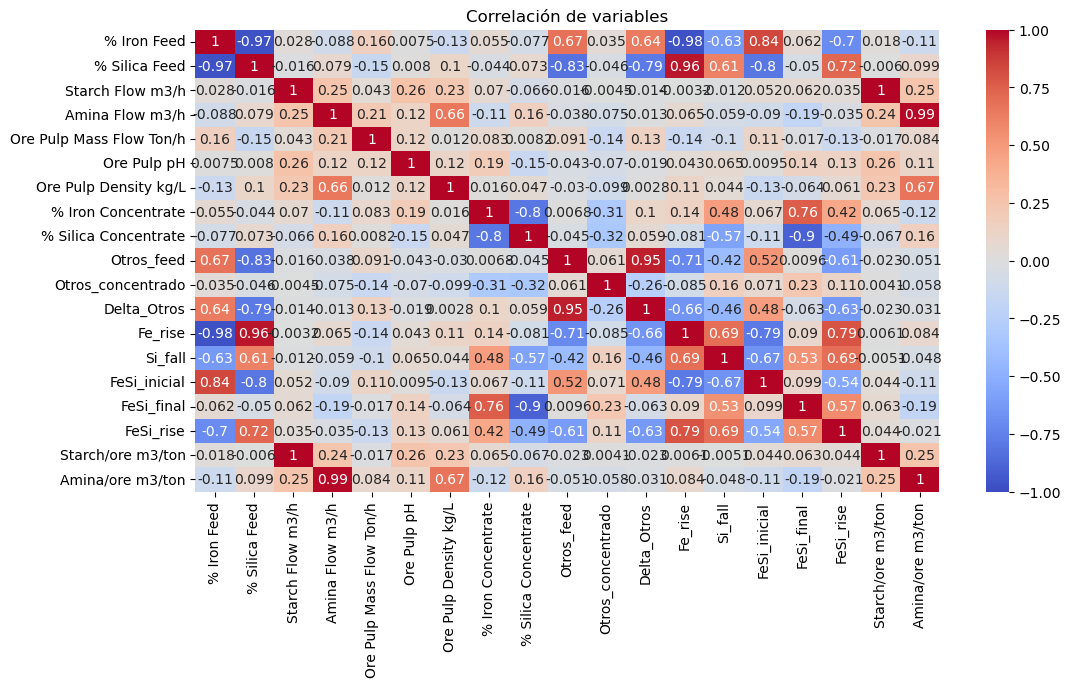

In [17]:

data_01["Otros_feed"]=100-data_01["% Iron Feed"]-data_01["% Silica Feed"]
data_01["Otros_concentrado"]=100-data_01["% Iron Concentrate"]-data_01["% Silica Concentrate"]
data_01["Delta_Otros"]=data_01["Otros_feed"]-data_01["Otros_concentrado"]
data_01["Fe_rise"] = (data_01["% Iron Concentrate"] - data_01["% Iron Feed"])/data_01["% Iron Feed"]
data_01["Si_fall"] = (data_01["% Silica Concentrate"] - data_01["% Silica Feed"])/data_01["% Silica Feed"]*-1
data_01["FeSi_inicial"]= data_01["% Iron Feed"] / data_01["% Silica Feed"]
data_01["FeSi_final"]= data_01["% Iron Concentrate"] / data_01["% Silica Concentrate"]
data_01["FeSi_rise"] = (data_01["FeSi_final"] - data_01["FeSi_inicial"])/data_01["FeSi_inicial"]
data_01["Starch/ore m3/ton"]= data_01["Starch Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]
data_01["Amina/ore m3/ton"]= data_01["Amina Flow m3/h"] / data_01["Ore Pulp Mass Flow Ton/h"]
# esta parte es temporal

# del data_01["Amina Flow m3/h"]
# del data_01["Starch Flow m3/h"]


plt.figure(figsize=(12, 6))
sns.heatmap(data_01.corr(), annot=True, cmap="coolwarm",vmin=-1, vmax=1)
plt.title('Correlación de variables')
plt.show()


In [18]:
columnas=data_01.columns
nombres=["% Hierro alimentación",
         "% Sílice alimentación",
         "Flujo de almidón",
         "Flujo de amina",
         "Flujo de mena",
         "pH de la mena",
         "Densidad de la mena",
         "% Hierro concentrado",
         "% Sílice concentrado",
         "% Otros en alimentación",
        "% Otros en concentrado",
        "Cambio concentración de otros",    
         "Aumento \nconcentración de hierro",
         "Disminución \nconcentración de sílice",
         "Relación Fe/Si inicial",
         "Relación Fe/Si final",
         "Aumento de \nla relación Fe/Si",
        "Relación de almidón \npor tonelada\n de mineral m3/ton",
        "Relación de amina\n portonelada\n de mineral m3/ton"
         ]
dict_nombres=dict(zip(columnas,nombres))

In [19]:
data_correlacion=data_01.copy()
data_correlacion.columns=nombres
del data_correlacion["Flujo de amina"]
del data_correlacion["Flujo de mena"]
del data_correlacion["Flujo de almidón"]
del data_correlacion["Densidad de la mena"]
del data_correlacion["% Otros en alimentación"]
del data_correlacion["% Otros en concentrado"]
del data_correlacion["Cambio concentración de otros"]


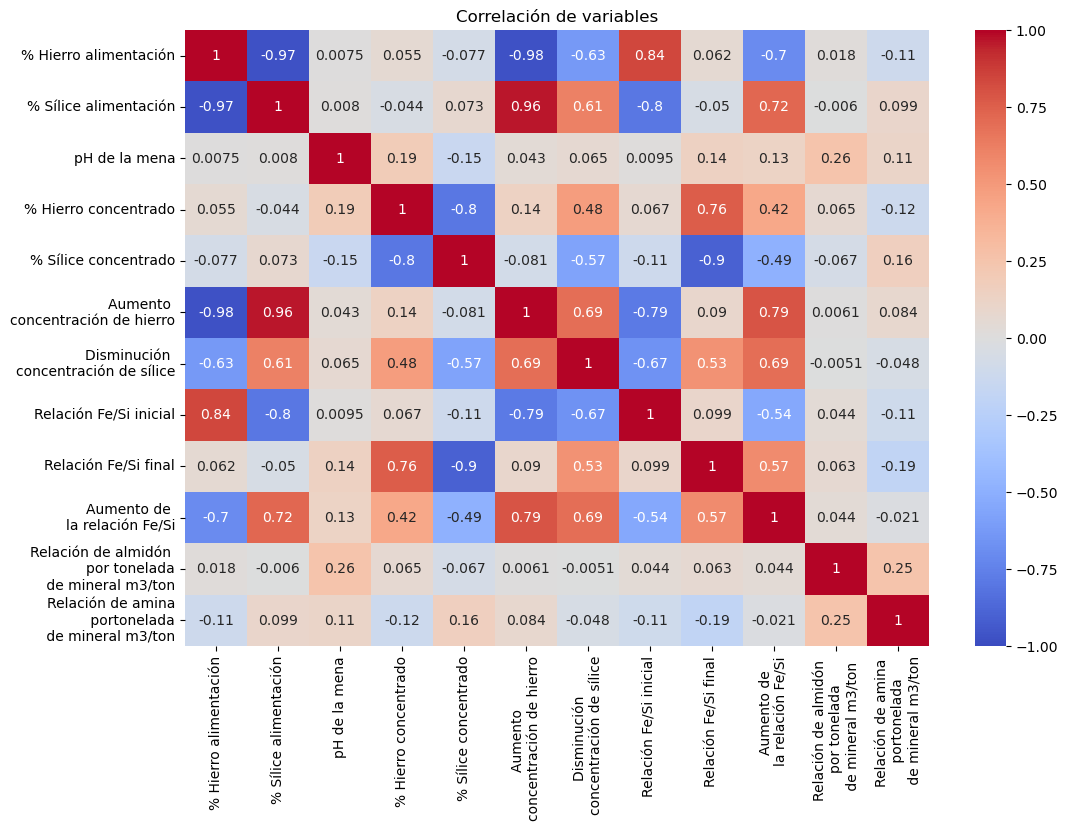

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_correlacion.corr(), annot=True, cmap="coolwarm",vmin=-1, vmax=1)
plt.title('Correlación de variables')
plt.show()

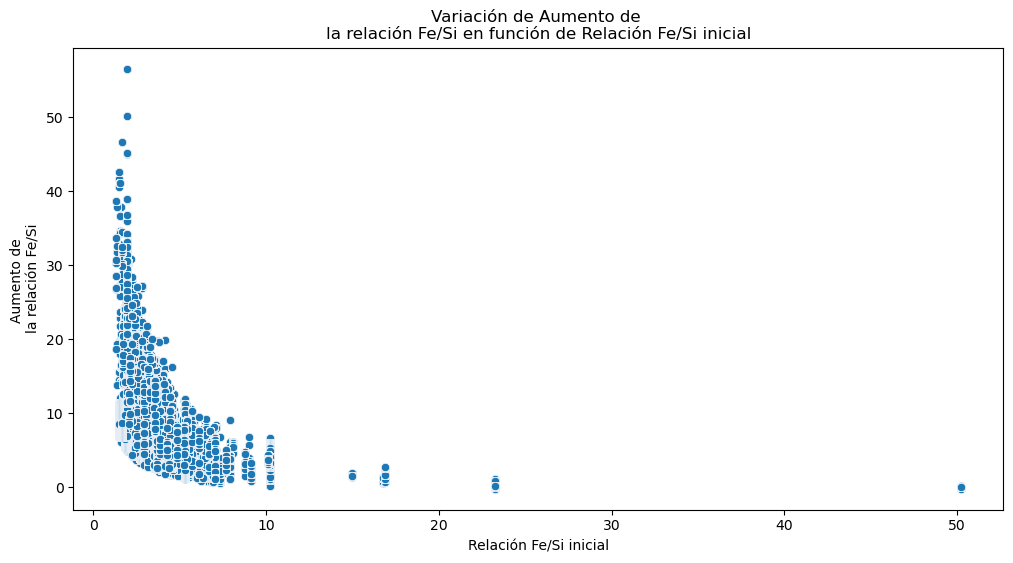

In [22]:
Variable_x="FeSi_inicial"
Variable_y="FeSi_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=Variable_x, y=Variable_y)
plt.xlabel(dict_nombres[Variable_x])
plt.ylabel(dict_nombres[Variable_y])
plt.title(f"Variación de {dict_nombres[Variable_y]} en función de {dict_nombres[Variable_x]}")
plt.show()

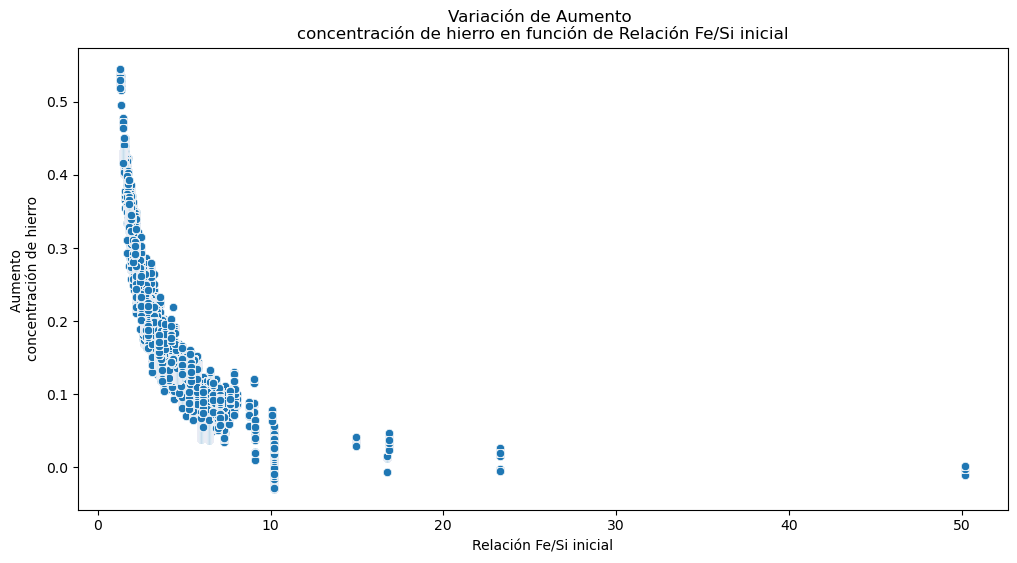

In [23]:
Variable_x="FeSi_inicial"
Variable_y="Fe_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=Variable_x, y=Variable_y)
plt.xlabel(dict_nombres[Variable_x])
plt.ylabel(dict_nombres[Variable_y])    
plt.title(f"Variación de {dict_nombres[Variable_y]} en función de {dict_nombres[Variable_x]}")
plt.show()

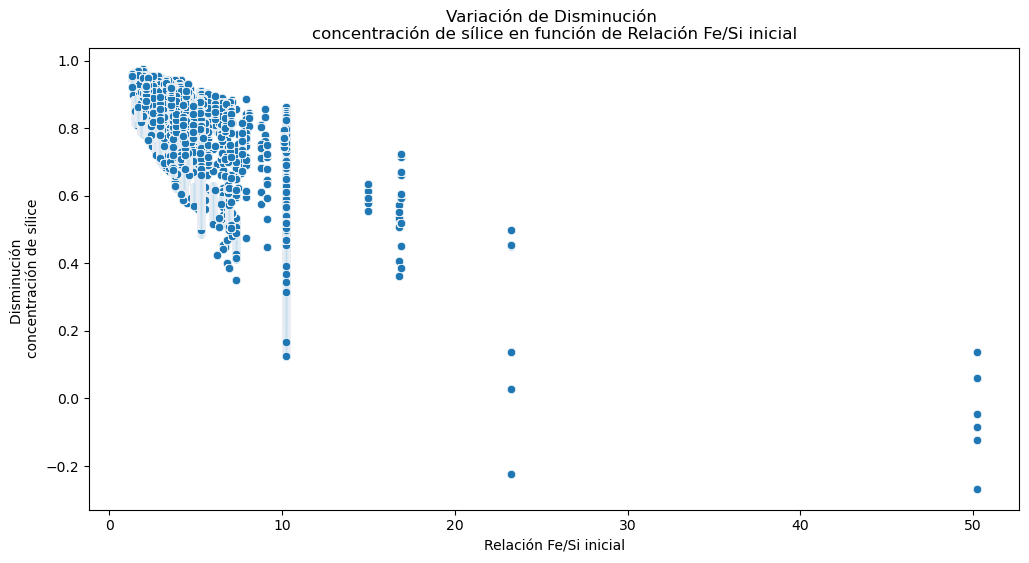

In [24]:
variable_x="FeSi_inicial"
variable_y="Si_fall"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=variable_x, y=variable_y)
plt.xlabel(dict_nombres[variable_x])
plt.ylabel(dict_nombres[variable_y])
plt.title(f"Variación de {dict_nombres[variable_y]} en función de {dict_nombres[variable_x]}")
plt.show()

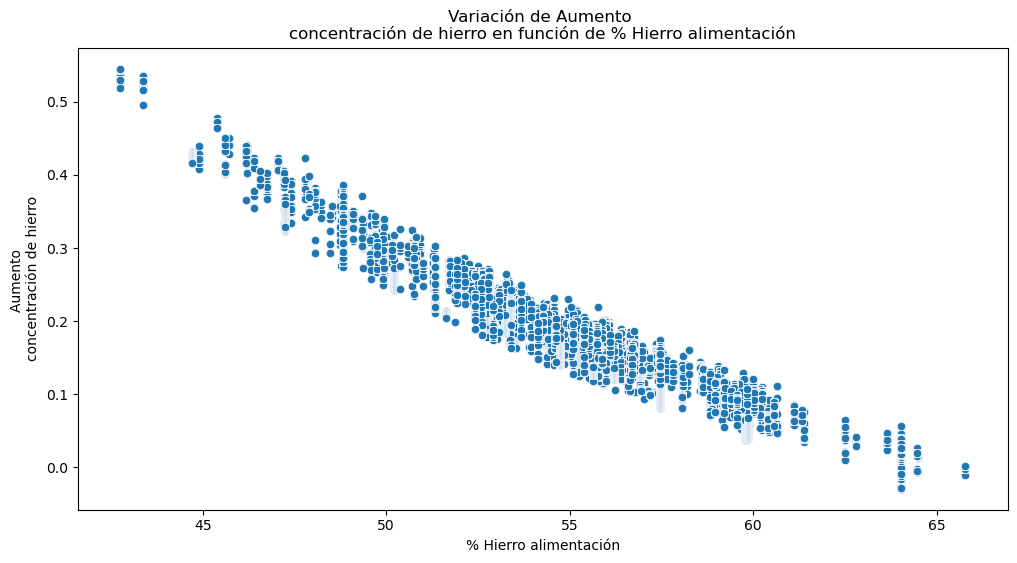

In [25]:
variable_x="% Iron Feed"
variable_y="Fe_rise"
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_01, x=variable_x, y=variable_y)
plt.xlabel(dict_nombres[variable_x])
plt.ylabel(dict_nombres[variable_y])
plt.title(f"Variación de {dict_nombres[variable_y]} en función de {dict_nombres[variable_x]}")
plt.show()

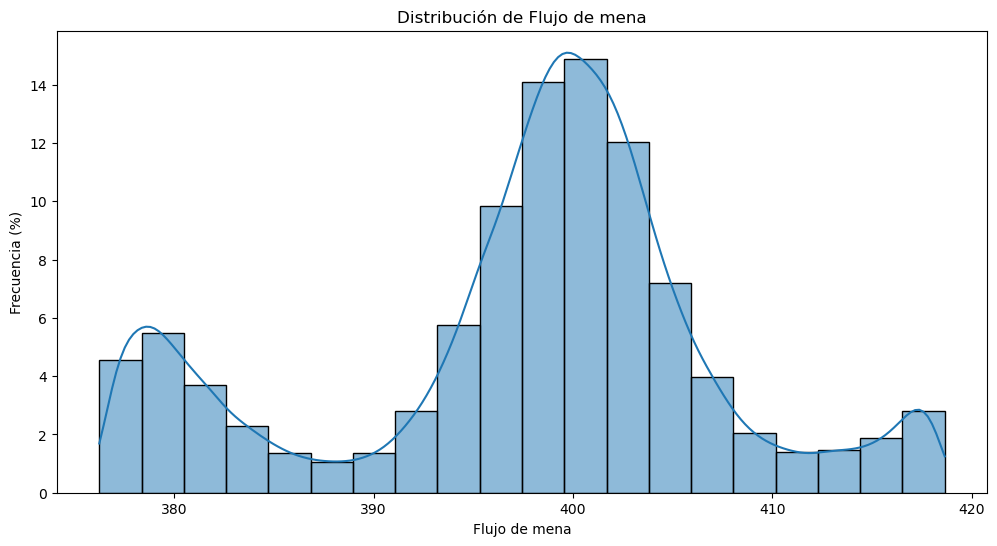

In [26]:
plt.figure(figsize=(12, 6))
data="Ore Pulp Mass Flow Ton/h"
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

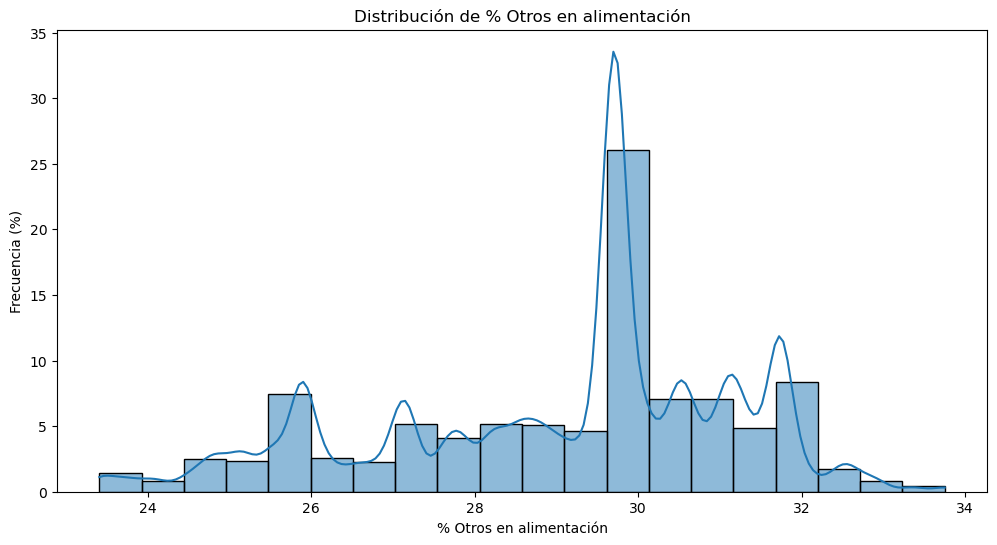

In [27]:
data="Otros_feed"
plt.figure(figsize=(12, 6))
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

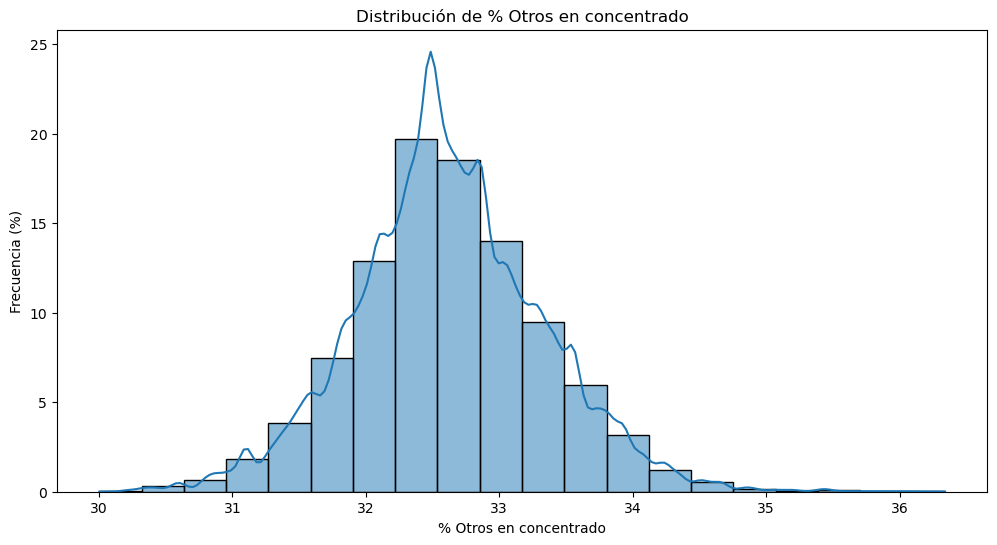

In [28]:
data="Otros_concentrado"
plt.figure(figsize=(12, 6))
sns.histplot(data_01[data], bins=sturges(data_01[data]), kde=True,stat="percent")
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

In [29]:
# filtrado de outliers de FeSi_inicial
interquartil= data_01["FeSi_inicial"].quantile(0.75)-data_01["FeSi_inicial"].quantile(0.25)
valor_corte_inf=data_01["FeSi_inicial"].quantile(0.25)-1.5*interquartil
valor_corte_sup=data_01["FeSi_inicial"].quantile(0.75)+1.5*interquartil
data_02=data_01[(data_01["FeSi_inicial"]>valor_corte_inf) & (data_01["FeSi_inicial"]<valor_corte_sup)]


In [30]:
valor_corte=data_02["% Iron Concentrate"].quantile(0.1)
data_filtrado_1=data_02[data_02["% Iron Concentrate"]>valor_corte]
data_filtrado_2=data_02[data_02["% Iron Concentrate"]<=valor_corte]


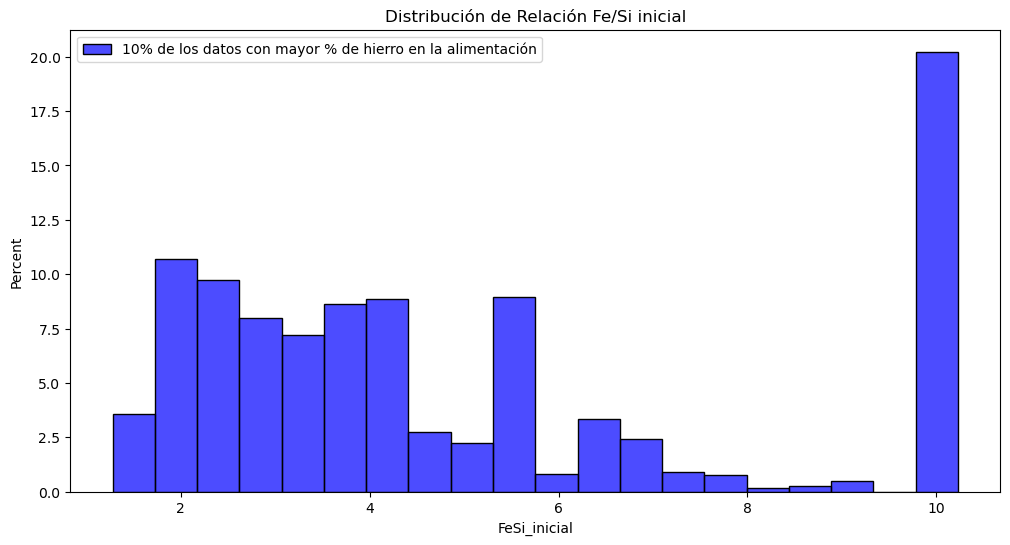

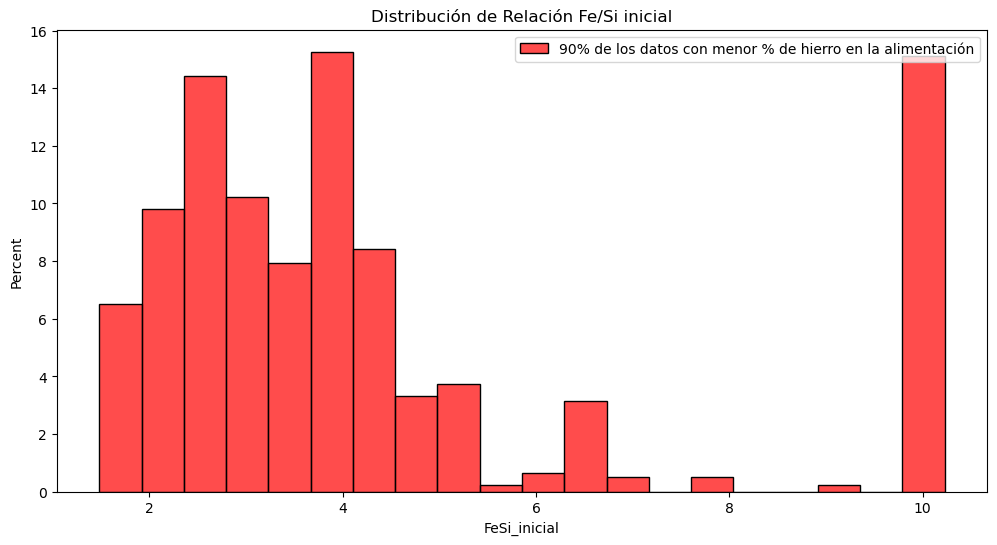

In [31]:
plt.figure(figsize=(12, 6))
variable_a_anailizar="FeSi_inicial"
sns.histplot(data=data_filtrado_1, x=variable_a_anailizar,bins=sturges(data_01[variable_a_anailizar]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="10% de los datos con mayor % de hierro en la alimentación")
plt.title(f"Distribución de {dict_nombres[variable_a_anailizar]}")
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
variable_a_anailizar="FeSi_inicial"
sns.histplot(data=data_filtrado_2, x=variable_a_anailizar,bins=sturges(data_01[variable_a_anailizar]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="90% de los datos con menor % de hierro en la alimentación")
plt.title(f"Distribución de {dict_nombres[variable_a_anailizar]}")
plt.legend()
plt.show()

In [32]:
print(data_filtrado_1.describe())
espacios()
print(data_filtrado_2.describe())

         % Iron Feed  % Silica Feed  Starch Flow m3/h  Amina Flow m3/h  \
count  657324.000000  657324.000000     657324.000000    657324.000000   
mean       56.303140      14.650151       2891.785346       486.380411   
std         5.173658       6.804846       1214.943775        91.221346   
min        42.740000       6.080000          0.002026       241.669000   
25%        52.610000       8.870000       2083.180000       430.035750   
50%        56.200000      13.540000       3052.055000       502.023000   
75%        59.720000      19.940000       3747.292500       551.977000   
max        64.030000      33.400000       6300.230000       739.538000   

       Ore Pulp Mass Flow Ton/h    Ore Pulp pH  Ore Pulp Density kg/L  \
count             657324.000000  657324.000000          657324.000000   
mean                 397.831233       9.788136               1.681259   
std                    9.525742       0.378727               0.068464   
min                  376.249000       8.7

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


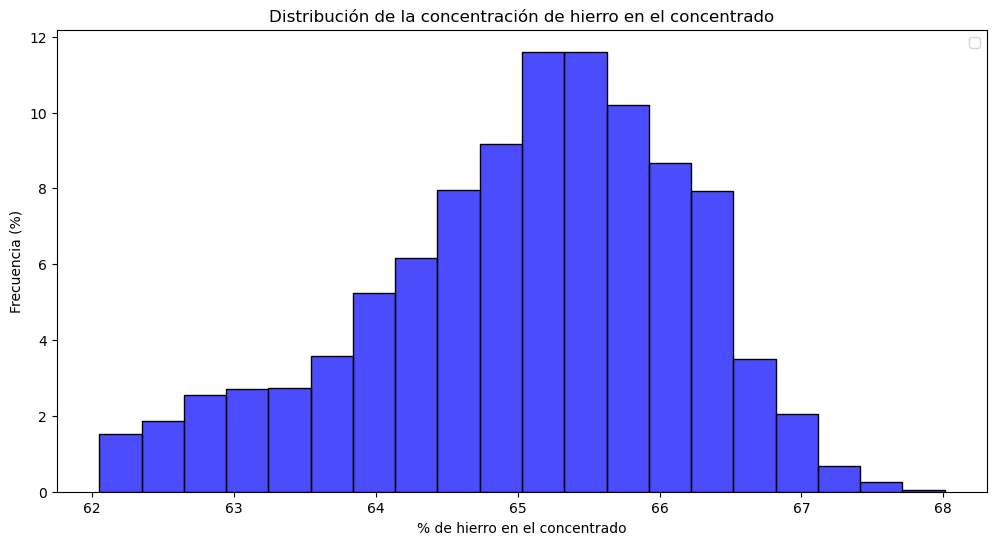

In [72]:
# GRafica de la concentración de hierro en el concentrado
plt.figure(figsize=(12, 6))
sns.histplot(data=data_01, x="% Iron Concentrate",bins=sturges(data_01["% Iron Concentrate"]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent')
plt.legend()
plt.xlabel("% de hierro en el concentrado")
plt.ylabel("Frecuencia (%)")
plt.title("Distribución de la concentración de hierro en el concentrado")
plt.show()

In [34]:
analisis_clases=data_01.copy()
def clasificador(dataFrame):
    if dataFrame["% Iron Concentrate"]>67:
        return "Muy Alta"
    elif dataFrame["% Iron Concentrate"]>65:
        return "Alta"
    elif dataFrame["% Iron Concentrate"]<62:
        return "Baja"
    else:
        return "Media"
analisis_clases["Clase"]=analisis_clases.apply(clasificador,axis=1)
print(analisis_clases["Clase"].value_counts())
# del data_filtrado_1
# del data_filtrado_2




Clase
Alta        410059
Media       315874
Muy Alta     11520
Name: count, dtype: int64


In [35]:
data_Alta=analisis_clases[analisis_clases["Clase"]=="Alta"]
data_Media=analisis_clases[analisis_clases["Clase"]=="Media"]
data_Muy_Alta=analisis_clases[analisis_clases["Clase"]=="Muy Alta"]
corte=62
data_Media_Corte=data_Media[data_Media["% Iron Feed"]<corte]
data_Alta_Corte=data_Alta[data_Alta["% Iron Feed"]<corte]
data_Muy_Alta_Corte=data_Muy_Alta[data_Muy_Alta["% Iron Feed"]<corte]
analisis_clases_corte=analisis_clases[analisis_clases["% Iron Feed"]<corte]


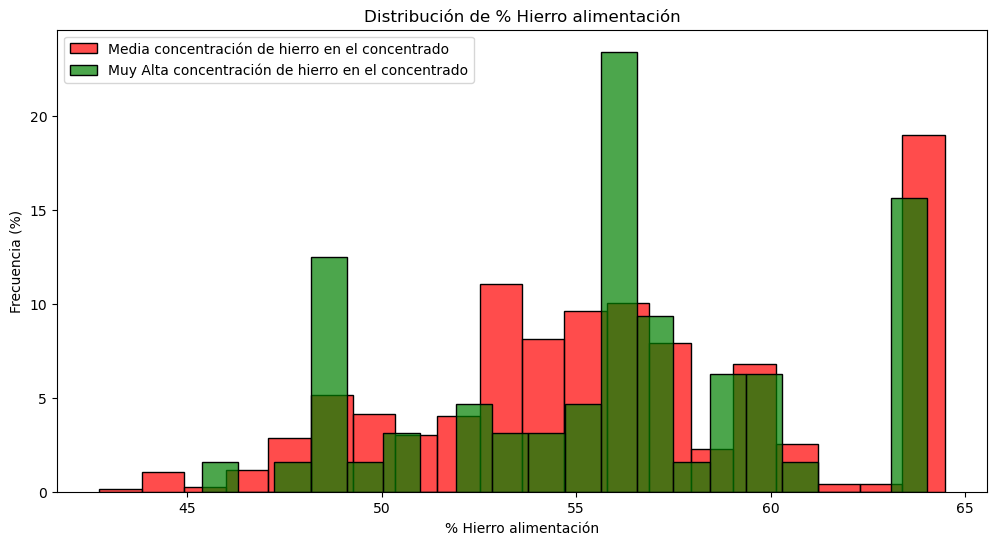

In [36]:
data="% Iron Feed"
plt.figure(figsize=(12, 6))
# sns.histplot(data=data_Alta, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Media, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

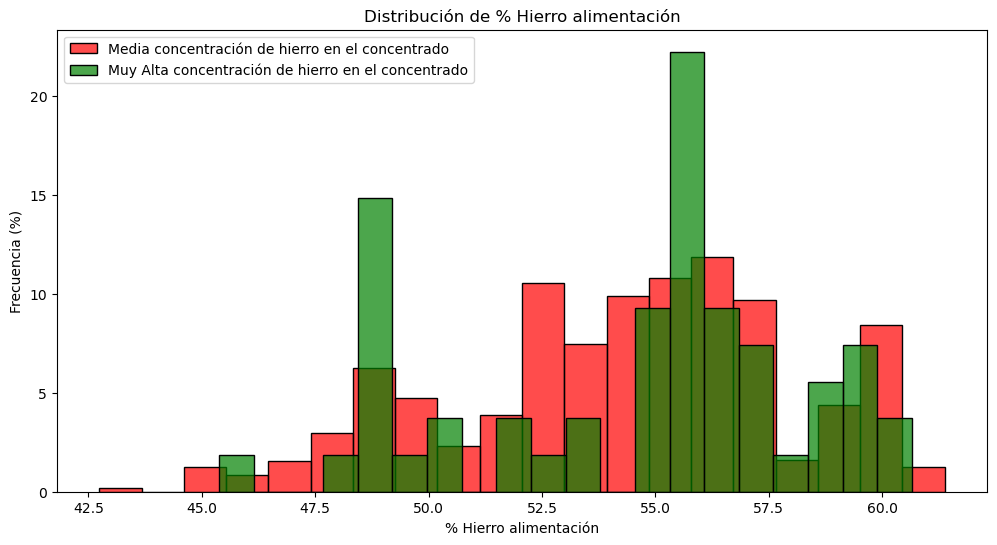

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_Media_Corte, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
# sns.histplot(data=data_Alta_Corte, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.5, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta_Corte, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

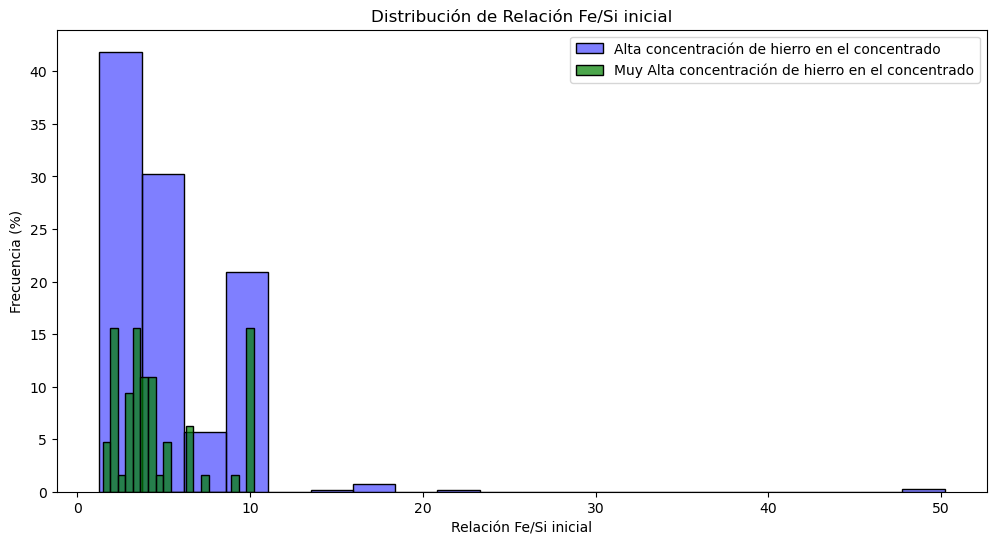

In [38]:
data="FeSi_inicial"
plt.figure(figsize=(12, 6))
# sns.histplot(data=data_Media, x=data,bins=sturges(data_01[data]), color='red', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Media concentración de hierro en el concentrado")
sns.histplot(data=data_Alta, x=data,bins=sturges(data_01[data]), color='blue', edgecolor='black', linewidth=1, alpha=0.5, stat='percent', label="Alta concentración de hierro en el concentrado")
sns.histplot(data=data_Muy_Alta, x=data,bins=sturges(data_01[data]), color='green', edgecolor='black', linewidth=1, alpha=0.7, stat='percent', label="Muy Alta concentración de hierro en el concentrado")
plt.legend()
plt.xlabel(dict_nombres[data])
plt.ylabel("Frecuencia (%)")
plt.title(f"Distribución de {dict_nombres[data]}")
plt.show()

In [39]:
print(data_Muy_Alta.describe())
espacios()
print(data_Alta.describe())
espacios()
print(data_Media.describe())
espacios()
orden_clases=["Muy Alta","Alta","Media"]
# with pd.ExcelWriter("Resumen_datos.xlsx") as writer:
#     # Guardar cada DataFrame en una hoja separada
#     data_Muy_Alta.describe().to_excel(writer, sheet_name="Muy_Alta")
#     data_Alta.describe().to_excel(writer, sheet_name="Alta")
#     data_Media.describe().to_excel(writer, sheet_name="Media")
#     data_Muy_Alta_Corte.describe().to_excel(writer, sheet_name="Muy_Alta_Corte")
#     data_Alta_Corte.describe().to_excel(writer, sheet_name="Alta_Corte")
#     data_Media_Corte.describe().to_excel(writer, sheet_name="Media_Corte")

        % Iron Feed  % Silica Feed  Starch Flow m3/h  Amina Flow m3/h  \
count  11520.000000   11520.000000      11520.000000     11520.000000   
mean      56.102031      15.360625       3323.852492       464.939974   
std        4.891224       6.531908       1181.149935        85.615342   
min       45.380000       6.260000          0.857060       247.070000   
25%       53.140000      10.705000       2512.712050       398.187000   
50%       56.000000      15.030000       3485.285000       475.445000   
75%       59.087500      18.640000       4105.170000       521.353000   
max       64.030000      30.900000       6250.000000       738.766000   

       Ore Pulp Mass Flow Ton/h   Ore Pulp pH  Ore Pulp Density kg/L  \
count              11520.000000  11520.000000           11520.000000   
mean                 397.576319      9.900882               1.700086   
std                    9.159090      0.334762               0.063048   
min                  376.259000      8.753470         

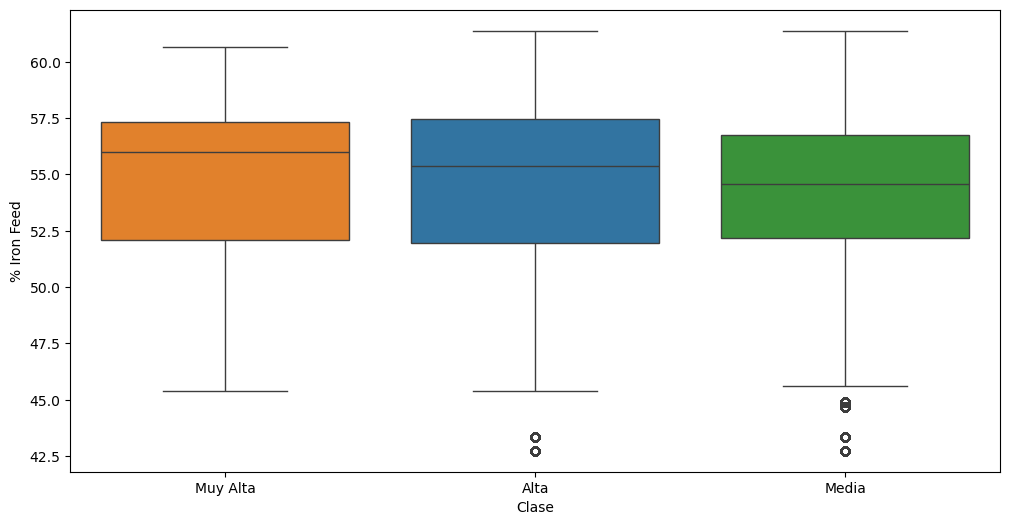

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=analisis_clases_corte, x="Clase", y="% Iron Feed",hue="Clase",order=orden_clases)
plt.show()

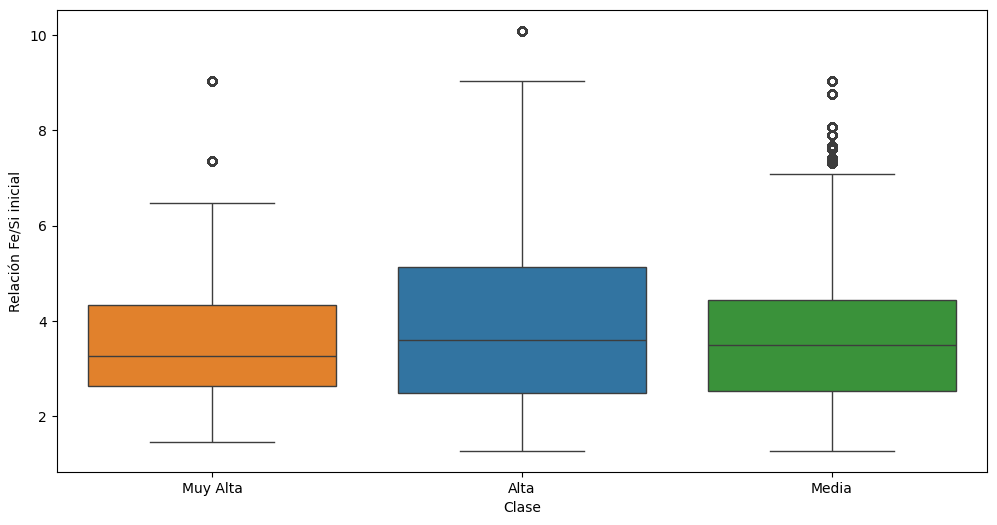

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=analisis_clases_corte, x="Clase", y="FeSi_inicial", hue="Clase",order=orden_clases)
plt.ylabel(dict_nombres["FeSi_inicial"])

plt.show()

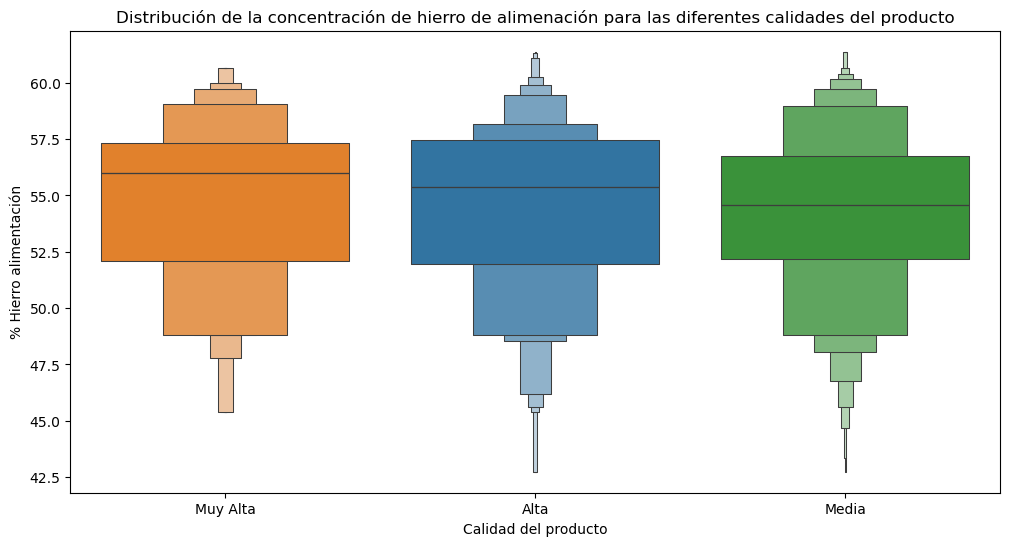

In [70]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=analisis_clases_corte, x="Clase", y="% Iron Feed", hue="Clase",order=orden_clases)
plt.ylabel(dict_nombres["% Iron Feed"])
plt.xlabel("Calidad del producto")
plt.title("Distribución de la concentración de hierro de alimenación para las diferentes calidades del producto")
plt.show()

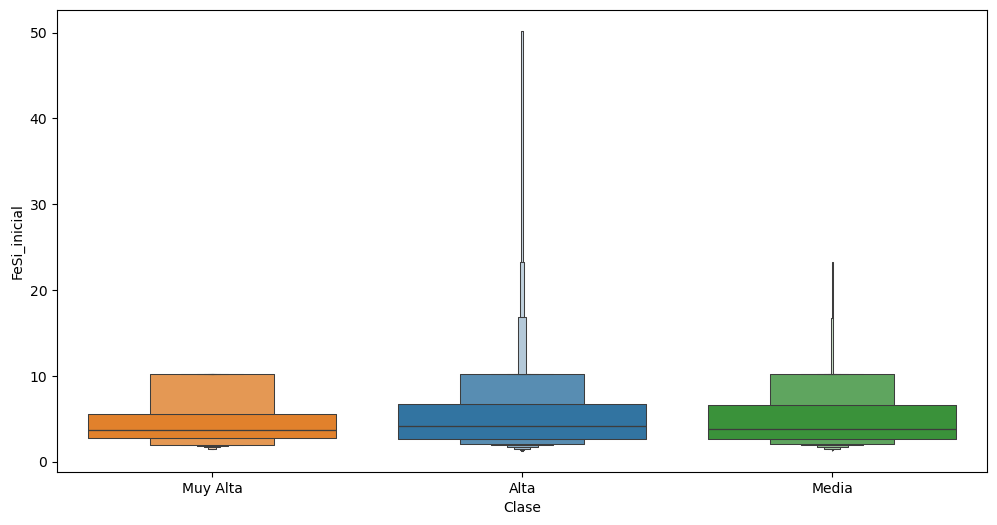

In [43]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=analisis_clases, x="Clase", y="FeSi_inicial", hue="Clase",order=orden_clases)
plt.show()

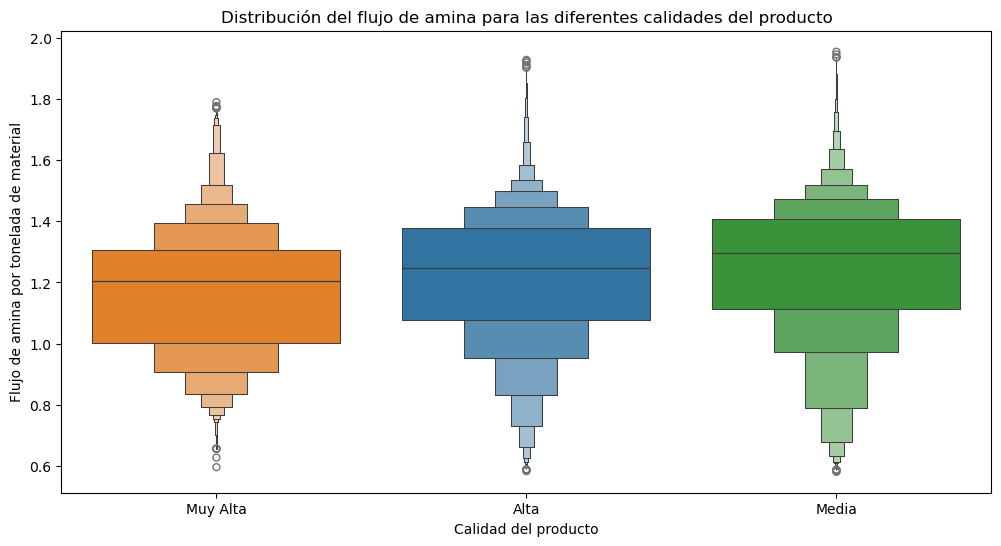

In [65]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=analisis_clases, x="Clase", y="Amina/ore m3/ton", hue="Clase",order=orden_clases)
plt.xlabel("Calidad del producto")
plt.ylabel("Flujo de amina por tonelada de material")
plt.title("Distribución del flujo de amina para las diferentes calidades del producto")
plt.show()

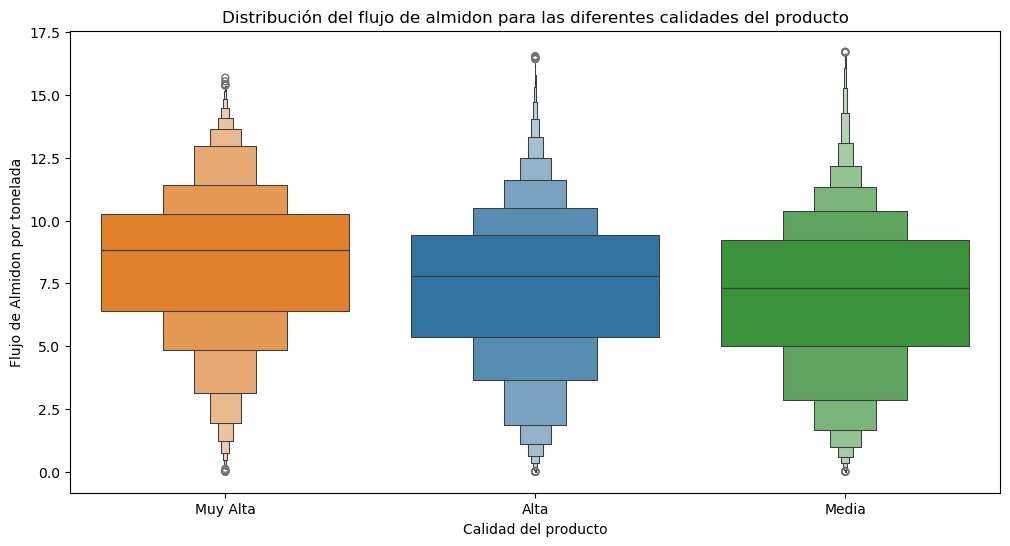

In [68]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=analisis_clases, x="Clase", y="Starch/ore m3/ton", hue="Clase",order=orden_clases)
plt.ylabel("Flujo de Almidon por tonelada")
plt.xlabel("Calidad del producto")
plt.title("Distribución del flujo de almidon para las diferentes calidades del producto")
plt.show()

In [69]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=analisis_clases, x="Clase", y="Otros Feed", hue="Clase",order=orden_clases)
plt.show()

ValueError: Could not interpret value `Otros Feed` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

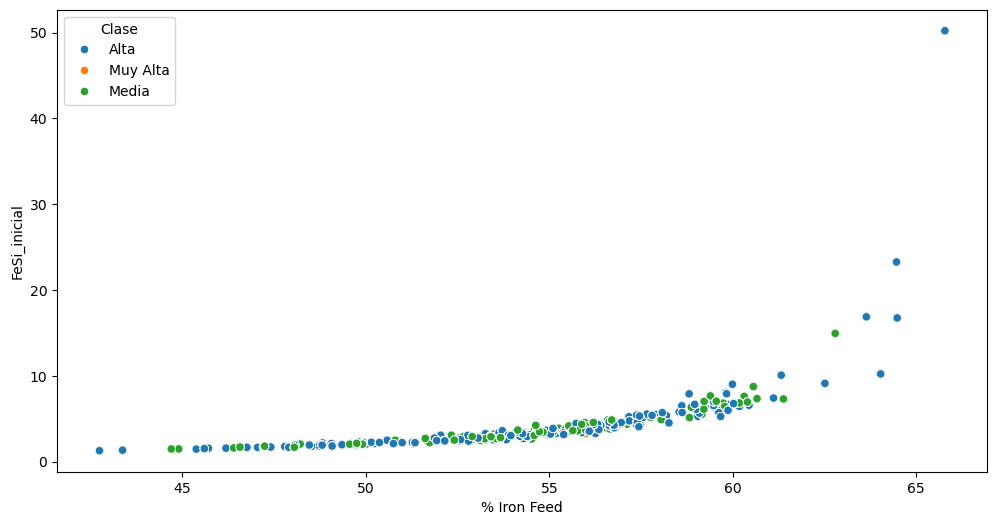

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=analisis_clases, x="% Iron Feed", y="FeSi_inicial", hue="Clase")
plt.show()

In [49]:
analisis_clases.groupby("Clase").max()

,% Iron Feed,% Silica Feed,Starch Flow m3/h,Amina Flow m3/h,Ore Pulp Mass Flow Ton/h,Ore Pulp pH,Ore Pulp Density kg/L,% Iron Concentrate,% Silica Concentrate,Otros_feed,Otros_concentrado,Delta_Otros,Fe_rise,Si_fall,FeSi_inicial,FeSi_final,FeSi_rise,Starch/ore m3/ton,Amina/ore m3/ton
Clase,,,,,,,,,,,,,,,,,,,
Alta,65.78,33.4,6300.23,739.538,418.641,10.8081,1.853250,67.00,4.92,33.75,34.22000,1.65,0.545157,0.976294,50.213740,110.950000,56.532155,16.547922,1.928554
Media,64.48,33.4,6299.88,739.457,418.641,10.8078,1.852821,65.00,5.53,33.75,36.33759,0.95,0.519420,0.964046,23.270758,71.274725,35.958887,16.721693,1.955319
Muy Alta,64.03,30.9,6250.00,738.766,418.582,10.7601,1.853100,68.01,1.90,33.36,32.10000,1.54,0.478184,0.965372,10.228435,77.953488,41.687750,15.689139,1.790194


In [50]:
num_bins = int(np.ceil(1 + np.log2(len(analisis_clases))))
Variable_analizada="FeSi_inicial"
# Crear los bins y asignar cada valor de "% Iron Feed" a un bin
bins = pd.cut(analisis_clases[Variable_analizada], bins=num_bins)

# Calcular el promedio de cada bin
bin_labels = bins.apply(lambda x: (x.left + x.right) / 2)

# Añadir los promedios de los bins al DataFrame
analisis_clases['Bin'] = bin_labels

# Contar cuántos valores hay en cada bin para cada clase
tabla_resultado = analisis_clases.groupby(['Clase', 'Bin'])[Variable_analizada].count().unstack(fill_value=0)

# Mostrar la tabla resultado
print(tabla_resultado)

Bin       2.4205  4.7750  7.1050  9.4350  11.7655  14.0960  16.4260  18.7560  \
Clase                                                                          
Alta      164301  129094   25560   85704        0      720     2880        0   
Media     134673   87805   30960   61356        0      360      360        0   
Muy Alta    5400    3240     900    1980        0        0        0        0   

Bin       21.0860  23.4165  ...  28.0770  30.4070  32.7370  35.0675  37.3980  \
Clase                       ...                                                
Alta            0      720  ...        0        0        0        0        0   
Media           0      360  ...        0        0        0        0        0   
Muy Alta        0        0  ...        0        0        0        0        0   

Bin       39.7280  42.0580  44.3880  46.7185  49.0490  
Clase                                                  
Alta            0        0        0        0     1080  
Media           0        0    

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5504\374856256.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_resultado = analisis_clases.groupby(['Clase', 'Bin'])[Variable_analizada].count().unstack(fill_value=0)


In [51]:

tabla_resultado=tabla_resultado.T
tabla_resultado['Total'] = tabla_resultado.sum(axis=1)
tabla_resultado["Alta"]=tabla_resultado["Alta"]/tabla_resultado["Total"]*100
tabla_resultado["Media"]=tabla_resultado["Media"]/tabla_resultado["Total"]*100
tabla_resultado["Muy Alta"]=tabla_resultado["Muy Alta"]/tabla_resultado["Total"]*100
# Mostrar la tabla resultado
print(tabla_resultado)
del tabla_resultado["Total"]
tabla_resultado.rename_axis(f"{dict_nombres[Variable_analizada]}",axis=0,inplace=True)
# print(type(tabla_resultado.index[0]))

Clase          Alta      Media  Muy Alta   Total
Bin                                             
2.4205    53.979972  44.245895  1.774133  304374
4.7750    58.642040  39.886163  1.471797  220139
7.1050    44.514107  53.918495  1.567398   57420
9.4350    57.504026  41.167472  1.328502  149040
11.7655         NaN        NaN       NaN       0
14.0960   66.666667  33.333333  0.000000    1080
16.4260   88.888889  11.111111  0.000000    3240
18.7560         NaN        NaN       NaN       0
21.0860         NaN        NaN       NaN       0
23.4165   66.666667  33.333333  0.000000    1080
25.7470         NaN        NaN       NaN       0
28.0770         NaN        NaN       NaN       0
30.4070         NaN        NaN       NaN       0
32.7370         NaN        NaN       NaN       0
35.0675         NaN        NaN       NaN       0
37.3980         NaN        NaN       NaN       0
39.7280         NaN        NaN       NaN       0
42.0580         NaN        NaN       NaN       0
44.3880         NaN 

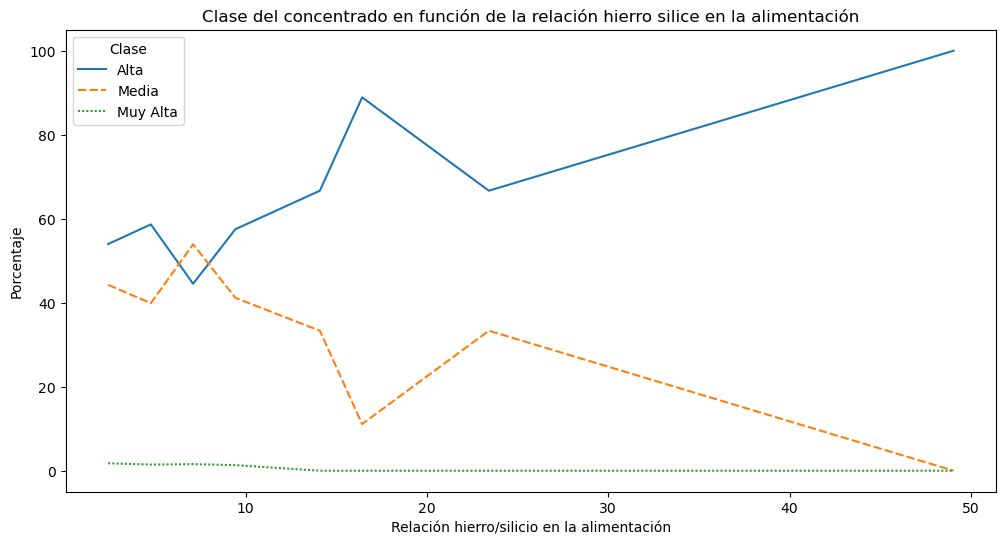

In [54]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=tabla_resultado)
plt.xlabel("Relación hierro/silicio en la alimentación")
plt.ylabel("Porcentaje")
plt.title("Clase del concentrado en función de la relación hierro silice en la alimentación")
plt.show()

In [53]:
for columna in columnas:
    print(f"{columna}:{dict_nombres[columna]}")

% Iron Feed:% Hierro alimentación
% Silica Feed:% Sílice alimentación
Starch Flow m3/h:Flujo de almidón
Amina Flow m3/h:Flujo de amina
Ore Pulp Mass Flow Ton/h:Flujo de mena
Ore Pulp pH:pH de la mena
Ore Pulp Density kg/L:Densidad de la mena
% Iron Concentrate:% Hierro concentrado
% Silica Concentrate:% Sílice concentrado
Otros_feed:% Otros en alimentación
Otros_concentrado:% Otros en concentrado
Delta_Otros:Cambio concentración de otros
Fe_rise:Aumento 
concentración de hierro
Si_fall:Disminución 
concentración de sílice
FeSi_inicial:Relación Fe/Si inicial
FeSi_final:Relación Fe/Si final
FeSi_rise:Aumento de 
la relación Fe/Si
Starch/ore m3/ton:Relación de almidón 
por tonelada
 de mineral m3/ton
Amina/ore m3/ton:Relación de amina
 portonelada
 de mineral m3/ton
